In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
figpath="../../figures/supplementary/"
!mkdir $figpath

mkdir: ../../figures/supplementary/: File exists


In [17]:
def return_disc_rad(lmax):
    return min(180.,180.*(24./lmax))

def return_area(discsize):
    def integrand(x):
        return sin(x)
    return 2.*pi*quad(integrand,0.,discsize*pi/180.)[0]

list_nside=[4,8,16,32,64,128,256,512,1024,2048,4096,8192]

lmax=[] ; odisc=[] ; disc_area=[] ; disc_pix=[] ; pix_frac=[] ; tot_pix=[]
disc_areah=[] ; disc_pixh=[] ; pix_frach=[]
for i in list_nside:
    lmax=append(lmax,3*i)
    tot_pix=append(tot_pix,h.nside2npix(i))
    odisc=append(odisc,return_disc_rad(3*i))
    print i,odisc
    disc_area=append(disc_area,return_area(return_disc_rad(3*i)))
    disc_areah=append(disc_areah,return_area(min(180.,3.*return_disc_rad(3*i))))

4 [ 180.]
8 [ 180.  180.]
16 [ 180.  180.   90.]
32 [ 180.  180.   90.   45.]
64 [ 180.   180.    90.    45.    22.5]
128 [ 180.    180.     90.     45.     22.5    11.25]
256 [ 180.     180.      90.      45.      22.5     11.25     5.625]
512 [ 180.      180.       90.       45.       22.5      11.25      5.625
    2.8125]
1024 [ 180.       180.        90.        45.        22.5       11.25       5.625
    2.8125     1.40625]
2048 [ 180.        180.         90.         45.         22.5        11.25
    5.625       2.8125      1.40625     0.703125]
4096 [ 180.         180.          90.          45.          22.5         11.25
    5.625        2.8125       1.40625      0.703125     0.3515625]
8192 [  1.80000000e+02   1.80000000e+02   9.00000000e+01   4.50000000e+01
   2.25000000e+01   1.12500000e+01   5.62500000e+00   2.81250000e+00
   1.40625000e+00   7.03125000e-01   3.51562500e-01   1.75781250e-01]


In [18]:
frac=1.
disc_pix=ceil(disc_area*frac*tot_pix/(4.*pi)).astype(int)
pix_frac=(disc_area*frac/(4.*pi))

disc_pixh=ceil(disc_areah*frac*tot_pix/(4.*pi)).astype(int)
pix_frach=(disc_areah*frac/(4.*pi))

<IPython.core.display.Javascript object>


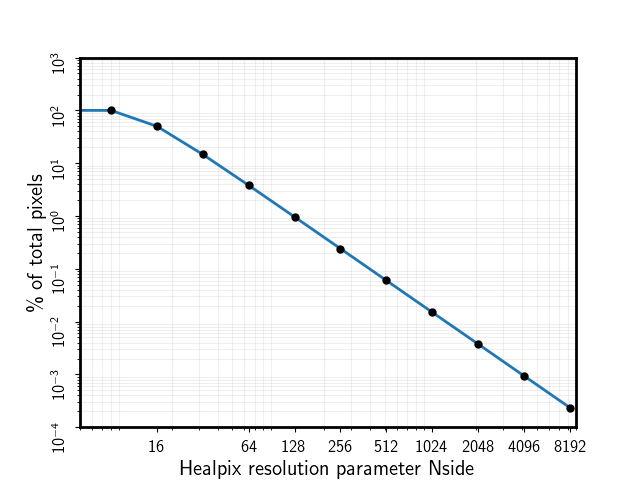

In [24]:
figure()
plot(list_nside,disc_pix*100./tot_pix,lw=2)
plot(list_nside,pix_frac*100.,"k.",label="",markersize=10)
#plot(list_nside,pix_frach*100.,"m.",label="",markersize=10)
ylim(1e-4,1000)
xlim(5,9000)
loglog()
#hlines(0.1,1,9000)
ylabel("\% of total pixels")
xlabel("Healpix resolution parameter Nside")
xticks([16,64,128,256,512,1024,2048,4096,8192],[16,64,128,256,512,1024,2048,4096,8192],fontsize="12")
yticks(fontsize=12,rotation=90)
grid(which=u"minor",ls="solid",alpha=0.2)
#savefig(figpath + "frac_of_disc_pixels.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


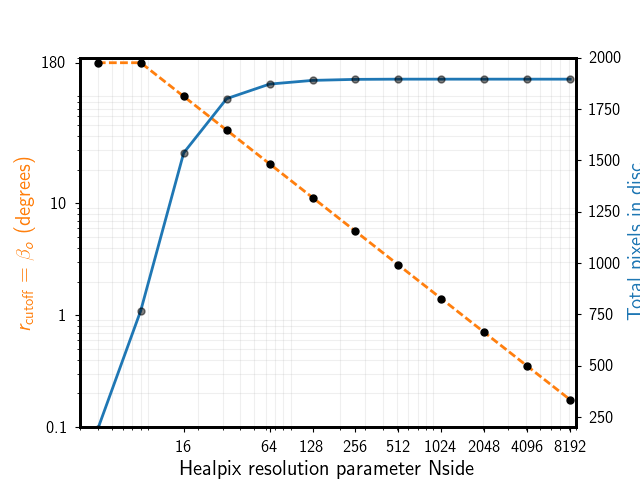

In [40]:
figure()
plot(list_nside,odisc,"--",color="#ff7f0e",lw=2,label="Disc radius")
plot(list_nside,odisc,"k.",markersize=10)
ylabel(r"$r_{\rm cutoff} = \beta_o$  (degrees)",color="#ff7f0e")
semilogy()
grid(which=u"minor",ls="solid",alpha=0.2)
yticks([0.1,1,10,180],[0.1,1,10,180],fontsize=12)
ylim(0.1,200)
semilogx()
xlabel("Healpix resolution parameter Nside")
xticks([16,64,128,256,512,1024,2048,4096,8192],[16,64,128,256,512,1024,2048,4096,8192],fontsize=12)

twinx()
plot(list_nside,disc_pix,lw=2,label="No. of pixels")
plot(list_nside,disc_pix,"k.",label="",markersize=10,alpha=0.5)
#plot(list_nside,disc_pixh,"m.",label="",markersize=10,alpha=0.5)
yticks(fontsize=12)
ylabel("Total pixels in disc",color="#1f77b4")
#semilogx()
ylim(200,2000)
xlim(3,9000)
savefig(figpath + "number_of_disc_pixels.pdf",dpi=300,bbox_inches="tight")




In [200]:
nside=8192
y=rk.real_space_queb_kernels(nside,tmax=4.,maxlmax=3*nside,sampling=2000)
y.calc_qu2eb_rad_kernel(3*nside)
y.calc_qu2queb_rad_kernel(3*nside)

KeyboardInterrupt: 

In [ ]:
t8192=y.rad_ker
y.calc_qu2eb_rad_kernel(3*4096) ; t4096=y.rad_ker
y.calc_qu2eb_rad_kernel(3*2048) ; t2048=y.rad_ker
y.calc_qu2eb_rad_kernel(3*1024) ; t1024=y.rad_ker
y.calc_qu2eb_rad_kernel(3*512) ; t512=y.rad_ker

In [ ]:
plot(y.theta*180./pi,t8192/max(t8192)) ; vlines(odisc[10],1e-5,1)
plot(y.theta*180./pi,t4096/max(t4096)) ; vlines(odisc[9],1e-5,1)
plot(y.theta*180./pi,t2048/max(t2048)) ; vlines(odisc[8],1e-5,1)
plot(y.theta*180./pi,t1024/max(t1024)) ; vlines(odisc[7],1e-5,1)
plot(y.theta*180./pi,t512/max(t512)) ; vlines(odisc[6],1e-5,1)
semilogy()
hlines(1e-2,1e-5,4)
xlim(1e-3,10)
ylim(1e-3,2)
semilogx()

In [317]:
nest=False
v=h.pix2vec(4096,0,nest=nest)
spixel=h.query_disc(4096,v,0.44*np.pi/180.,inclusive=True,fact=4,nest=nest)

[]

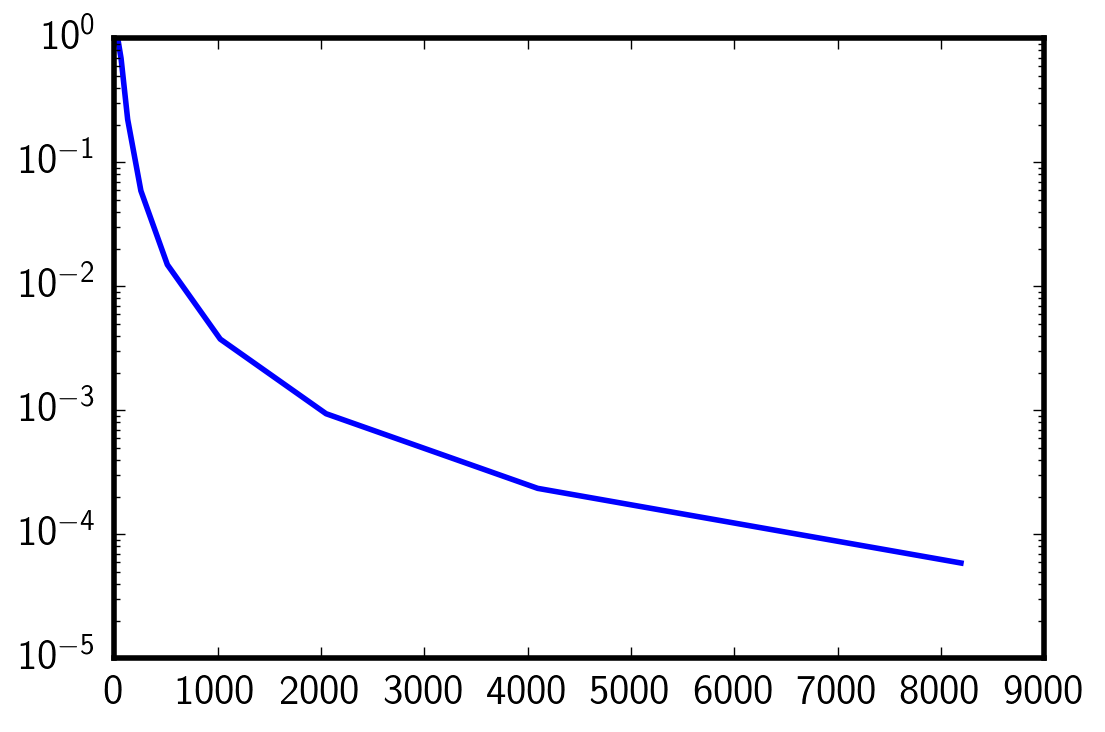

In [40]:
plot(list_nside,disc_pixh/tot_pix)
semilogy()